### Библиотеки

In [193]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sts
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Данные

In [194]:
df = pd.read_csv('edu_text_recall_data.csv')
df

,recall_score,higher_edu,far_from_uni,adhd,low_focus,text_complexity,age,reads_often,not_tired
0,49.901149,0,0,0,1,79.875422,33,1,0
1,45.694396,0,1,0,0,57.942067,27,0,0
2,43.077346,0,0,0,0,35.177133,25,0,1
3,46.803464,0,0,0,0,31.642170,27,1,1
4,61.015147,0,1,0,0,78.800936,38,1,1
...,...,...,...,...,...,...,...,...,...
4995,54.535661,1,0,0,1,52.862215,22,1,0
4996,68.945686,1,0,0,0,70.281638,24,0,1
4997,43.887603,0,1,0,0,54.913066,31,0,0
4998,38.935673,0,0,0,1,39.401686,32,0,1


### 1. Математически запишите и содержательно проинтерпретируйте потенциаль-ные исходы целевой переменной. Объясните, как они связаны с наблюдаемымизначениями целевой переменной.

#### Потенциальные исходы

Мы исследуем влияние высшего образования (higher_edu) на полученный recall_score. recall_score кратко назовем $R$, higher_edu - $H$

Определим потенциальные исходы для целевой переменной:

- $R_{1i} = 1$, если $H_i = 1$, то есть если индивид получил высшее (или еще более высокую степерь) образование

- $R_{0i} = 0$, если $H_i = 0$, то есть если индивид не получил высшего (или еще выше) образования


#### Связь с наблюдаемыми значениями

В реальности для одного человека нельзя наблюдать оба значения $R_{1i}$ и $R_{0i}$ - только одно, так как параллельных реальностей нет и у нас нет к ним доступа.

Тогда фактически Recall_score можно записать так:

$$R_i = R_{1i} * H_{i} + R_{0i} * (1 - H_{i})$$

- Если $H_{i} = 1$, то $R_{i} = R_{1i}$. 
- Если $H_{i} = 0$, то $R_{i} = R_{0i}$. 

### 2. Используя симулированные вами, но недоступные в реальных данных потенци- альные исходы (гипотетические значения), получите оценки среднего эффекта воздействия, условных средних эффектов воздействия и локального средне- го эффекта воздействия. Для ATE и LATE результаты представьте в форме таблицы, а для CATE постройте гистограмму или ядерную оценку функции плотности. Проинтерпретируйте полученные значения.

Примечание: для получения очень точных оценок эффектов воздействия с
помощью потенциальных исходов (гипотетических переменных) можно сперва
симулировать очень большого число наблюдений, например, несколько миллио-
нов. Затем, для ускорения вычислений, для оценивания эффектов воздействия
с помощью наблюдемых значений можно использовать часть выборки, напри-
мер, десять тысяч наблюдений.

#### Оценка ATE

$$ATE = E[R_{1i}] - E[R_{0i}]$$

In [195]:
df[(df['higher_edu'] == 1) & (df['far_from_uni'] == 1)]

,recall_score,higher_edu,far_from_uni,adhd,low_focus,text_complexity,age,reads_often,not_tired
5,57.321520,1,1,1,1,67.914417,15,0,1
16,41.653596,1,1,1,1,37.510987,23,0,0
27,51.857224,1,1,0,1,38.152665,33,1,0
42,67.099869,1,1,0,0,52.537426,26,0,1
44,53.793511,1,1,0,1,44.884426,34,0,1
...,...,...,...,...,...,...,...,...,...
4890,73.393615,1,1,0,0,61.642857,33,1,1
4912,52.155524,1,1,0,1,42.730530,22,1,0
4954,61.695712,1,1,0,0,52.641345,27,0,1
4975,52.367509,1,1,0,0,21.416790,32,1,0


In [196]:
df[['higher_edu', 'far_from_uni']].value_counts()

higher_edu  far_from_uni
0           0               1903
            1               1535
1           0               1132
            1                430
Name: count, dtype: int64

### 3. Оцените средний эффект воздействия как разницу в средних по выборкам тех, кто получил и не получил воздействие. Опишите недостатки соответствующего подхода с учетом специфики рассматриваемой вами экономической проблемы.

Примечание: в этом пункте и далее, если не сказано иное, используются лишь
наблюдаемые значения целевой переменной.

#### Ошибочная оценка ATE

Посчитаем ${ATE_{wrong}}$ = $E[R_{1i} | {H_{i} = 1}]$ - $E[R_{0i} | {H_{i} = 0}]$

Тогда для оценки ATE используем ЗБЧ и мат. ожидания заменим на средние значения:

In [197]:
ATE_hat_wrong = df.loc[(df['higher_edu'] == 1), 'recall_score'].mean() - df.loc[(df['higher_edu'] == 0), 'recall_score'].mean()
print(f'ATE_hat_wrong = {ATE_hat_wrong:.2f}')

ATE_hat_wrong = 16.78


#### Почему это ошибочная оценка:

##### Группы получивших и не получивших воздействие (получение высшего образования) сформированы ```не случайно```

Из-за этого $E[R_{1i}] \not = E[R_{1i} | {H_{i} = 1}]$ и $E[R_{0i}] \not = E[R_{0i} | {H_{i} = 0}]$, поэтому теоретическая запись этой оценки не равна настоящему ATE.

Если бы отбор был случайным (например, реально случайная лотерея среди всего населения за обязательство того, чтобы безусловно пойти на учебу), то выполнялось бы условие $E[R_{1i}] = E[R_{1i} | {H_{i} = 1}]$

##### Интуитивно:

- Если не фиксировать случайный отбор, то возникает проблема эндогенности и самоотбора. Изначально более склонные к умственной деятельности, чтению текстов и прохождению таких тестов люди могут выбрать пойти получать высшее образование в университет. Из-за этой проблемы получается, что при такой формулировке оценки мы в качестве эффекта от образования считаем еще и вклад других факторов, а нужно считать эффект только от образования.

### 4. Используя оценки, полученные лучшими из обученных ранее классификационных и регрессионных моделей, оцените средний эффект воздействия с помощью:
- метода наименьших квадратов.
- условных математических ожиданий.
- взвешивания на обратные вероятности (в случае возникновения ошибок
убедитесь в отсутствии оценок вероятностей, равных 0 или 1 и при необ-
ходимости измените метод оценивания).
- метода, обладающего двойной устойчивостью.
- двойного машинного обучения.

Сравните результаты и назовите ключевую предпосылку этих методов. Содержательно обсудите причины, по которым она может соблюдаться или нарушаться в вашем случае. Приведите содержательную экономическую интерпретацию оценки среднего эффекта воздействия.

Повышенная сложность: включите дополнительный метод, не рассматри-
вавшийся в курсе, и опишите его принцип работы, а также преимущества и
недостатки по сравнению с другими методами.

#### Оценка ATE методом МНК

В качестве регрессоров берем переменную воздействия ```higher_edu```

Также берем 6 контрольных переменных: `adhd`, `low_focus`, `text_complexity`, `age`, `reads_often`, `not_tired`

Инструментальную переменную `far_from_uni` не используем

In [198]:
ols_model = smf.ols('recall_score ~ higher_edu + adhd + low_focus + text_complexity + age + reads_often + not_tired', data=df).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           recall_score   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 2.831e+04
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:53:49   Log-Likelihood:                -9683.5
No. Observations:                5000   AIC:                         1.938e+04
Df Residuals:                    4992   BIC:                         1.944e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          25.6799      0.130    198.084      0.000      25.426      25.934
higher_edu         15.3151      0.052    294.615      0.000      15.213      15.417
adhd               -4.8102      0.078    -61.529      0.000      -4.963      -4.657
low_focus          -6.5196      0.056   -116.352      0.000      -6.629      -6.410
text_complexity     0.3310      0.002    207.690      0.000       0.328       0.334
age                 0.0048      0.003      1.579      0.114      -0.001       0.011
reads_often         4.6844      0.049     95.308      0.000       4.588       4.781
not_tired           4.7358      0.049     96.707      0.000       4.640       4.832
==============================================================================
Omnibus:                      140.740   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.991
Skew:                          -0.146   Prob(JB):                     1.32e-67
Kurtosis:                       4.180   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
ATE_hat_ols = ols_model.params['higher_edu']

print(f'Оценка ATE методом МНК: {ATE_hat_ols:.2f}')

Оценка ATE методом МНК: 15.32


#### Оценка ATE методом условных мат. ожиданий

**Допущение об условной независимости:** $E[R_{1i} | X_i, H_i = 1] = E[Y_{1i} | X_i]$

При соблюдении допущения об условной независимости:

$ATE = E[R_{1i}] - E[R_{0i}] = E(E[R_{1i} | X_i] - E[R_{0i} | X_i]) = E( E[R_i | X_i, H_i = 1] − E[R_i | X_i, H_i = 0] )$

Это можно оценить как:

$$\hat{ATE} = \frac{1}{n} * \Sigma_{i=1}^n (E[R_i | X_i, H_i = 1] - E[R_i | X_i, H_i = 0])$$

Останется оценить E[R_i | X_i, H_i] и можно вычислить оценку ATE

$$\hat{ATE} = \frac{1}{n} * \Sigma_{i=1}^n (\hat{E}[R_i | X_i, H_i = 1] - \hat{E}[R_i | X_i, H_i = 0])$$

In [200]:
features_for_rf = ['higher_edu', 'adhd', 'low_focus', 'text_complexity', 'age', 'reads_often', 'not_tired']

treated_mask = (df['higher_edu'] == 1)
not_treated_mask = (df['higher_edu'] == 0)

X = df.loc[:, features_for_rf]
y = df.loc[:, 'recall_score']

X_treated = X.loc[treated_mask]
y_treated = y.loc[treated_mask]

X_not_treated = X.loc[not_treated_mask]
y_not_treated = y.loc[not_treated_mask]

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

In [202]:
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]   
}

def cv_random_forest(X, y, param_grid=param_grid):
    model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=KFold(n_splits=5, shuffle=True, random_state=42), 
    )
    grid_search.fit(X, y)

    return grid_search.best_estimator_

In [203]:
rf_model_treated = cv_random_forest(X_treated, y_treated)

In [204]:
rf_model_not_treated = cv_random_forest(X_not_treated, y_not_treated)

In [205]:
y_pred_treated = rf_model_treated.predict(X)
y_pred_not_treated = rf_model_not_treated.predict(X)

ATE_hat_condexp = np.mean(y_pred_treated - y_pred_not_treated)

print(f'Оценка ATE по методу условных мат. ожиданий: {ATE_hat_condexp:.2f}')

Оценка ATE по методу условных мат. ожиданий: 15.46


In [206]:
from catboost import CatBoostRegressor

catboost_param_grid = {
    'iterations': [100, 200, 300],     
    'depth': [3, 5, 7],                
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]           
}

def cv_catboost(X, y, param_grid=catboost_param_grid):
    model = CatBoostRegressor(random_state=42, silent=True) 
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        scoring='neg_mean_squared_error',
    )
    grid_search.fit(X, y)
    return grid_search.best_estimator_

In [207]:
cb_model_treated = cv_catboost(X_treated, y_treated)

cb_model_not_treated = cv_catboost(X_not_treated, y_not_treated)

y_pred_treated_cb = cb_model_treated.predict(X)
y_pred_not_treated_cb = cb_model_not_treated.predict(X)

ATE_cb = np.mean(y_pred_treated_cb - y_pred_not_treated_cb)
print(f'Оценка ATE по методу условных мат. ожиданий: (CatBoost): {ATE_cb:.2f}')

Оценка ATE по методу условных мат. ожиданий: (CatBoost): 15.37


#### Оценка ATE методом взвешенных обратных вероятностей

Снова требуется предпосылка об условной независимости

Тогда будет выполняться

$ATE = E[\cfrac{H_i * Y_i}{P(H_i = 1|X_i)}] − E[\cfrac{(1 - H_i) * Y_i}{1 - P(H_i = 1|X_i)}]$

Тогда оценка $\hat{ATE} = \cfrac{1}{n} \Sigma_{i=1}^n (\cfrac{H_i * Y_i}{\hat{P}(H_i = 1|X_i)}) - \cfrac{(1 - H_i) * Y_i}{1 - \hat{P}(H_i = 1|X_i)}$

Останется только оценить $\hat{P}(H_i | X_i)$

Оценим вероятности с помощью RandomForestClassifier и CatBoostClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression


# RF

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]   
}

def cv_random_forest_classifier(X, y, param_grid=param_grid):
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=KFold(n_splits=5, shuffle=True, random_state=42), 
    )
    grid_search.fit(X, y)

    return grid_search.best_estimator_



# CATBOOST

catboost_param_grid = {
    'iterations': [100, 200, 300],     
    'depth': [3, 5, 7],                
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]           
}

def cv_catboost_classifier(X, y, param_grid=catboost_param_grid):
    model = CatBoostClassifier(random_state=42, silent=True) 
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_log_loss',
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
    )
    grid_search.fit(X, y)
    return grid_search.best_estimator_


X_for_p_weights = df.loc[:, ['adhd', 'low_focus', 'text_complexity', 'age', 'reads_often', 'not_tired']]
y_for_p_weights = df.loc[:, 'higher_edu']

In [209]:
rf_for_p_weights_model = cv_random_forest_classifier(X_for_p_weights, y_for_p_weights)

In [210]:
rf_probas_for_p_weights = rf_for_p_weights_model.predict_proba(X_for_p_weights)[:, 1]

In [211]:
cb_for_p_weights_model = cv_catboost_classifier(X_for_p_weights, y_for_p_weights)

In [212]:
cb_probas_for_p_weights = cb_for_p_weights_model.predict_proba(X_for_p_weights)[:, 1]

In [213]:
logreg_for_p_weights_model = LogisticRegression().fit(X_for_p_weights, y_for_p_weights)
logreg_probas_for_p_weights = logreg_for_p_weights_model.predict_proba(X_for_p_weights)[:, 1]

In [214]:
part_for_p_weights_rf = (df['higher_edu'] * df['recall_score'] / rf_probas_for_p_weights - (1 - df['higher_edu']) * df['recall_score'] / (1 - rf_probas_for_p_weights))

part_for_p_weights_cb = (df['higher_edu'] * df['recall_score'] / cb_probas_for_p_weights - (1 - df['higher_edu']) * df['recall_score'] / (1 - cb_probas_for_p_weights))

part_for_p_weights_logreg = (df['higher_edu'] * df['recall_score'] / logreg_probas_for_p_weights - (1 - df['higher_edu']) * df['recall_score'] / (1 - logreg_probas_for_p_weights))

ATE_hat_pweights_rf = np.mean(part_for_p_weights_rf)
ATE_hat_pweights_cb = np.mean(part_for_p_weights_cb)
ATE_hat_pweights_logreg = np.mean(part_for_p_weights_logreg)

print(f'Оценка ATE методом взвешенных вероятностей (модель RF): {ATE_hat_pweights_rf:.2f}')
print(f'Оценка ATE методом взвешенных вероятностей (модель CatBoost): {ATE_hat_pweights_cb:.2f}')
print(f'Оценка ATE методом взвешенных вероятностей (модель LogReg): {ATE_hat_pweights_logreg:.2f}')

Оценка ATE методом взвешенных вероятностей (модель RF): 14.28
Оценка ATE методом взвешенных вероятностей (модель CatBoost): 14.82
Оценка ATE методом взвешенных вероятностей (модель LogReg): 15.59


#### Оценка ATE методом Двойной устойчивости (DRE)

У прошлых двух методов есть проблема - нужно иметь состоятельную оценку $E[Y_i | X_i, H_i]$ или $P(H_i = 1 | X_i)$, причем понять что полученная численная оценка состоятельна сложно, поэтому это добавляет неопределенности в выборе метода.

Double Robust метод помогает устранить неопределенность. Ему достаточно иметь состоятельную оценку хотя бы одну из этих двух. Согласно этому методу:

$\hat{ATE_{DR}} = \cfrac{1}{n} \Sigma_{i=1}^n ( E[R_i | X_i, H_i = 1] - E[R_i | X_i, H_i = 0] ) + \cfrac{1}{n} \Sigma_{i=1}^n (\cfrac{H_i * (R_i - E[R_i | X_i, H_i = 1])}{\hat{P}(H_i = 1|X_i)} - \cfrac{(1 - H_i) * (R_i - E[R_i | X_i, H_i = 0])}{1 - \hat{P}(H_i = 1|X_i)})$

У нас все уже оценено, поэтому подставим все оценки в формулу и получим оценку $ATE$

In [215]:
ATE_hat_dr_rf = np.mean(y_pred_treated - y_pred_not_treated) + np.mean(df['higher_edu'] * (df['recall_score'] - y_pred_treated) / rf_probas_for_p_weights - (1 - df['higher_edu']) * (df['recall_score'] - y_pred_not_treated) / (1 - rf_probas_for_p_weights))

ATE_hat_dr_cb = np.mean(y_pred_treated - y_pred_not_treated) + np.mean(df['higher_edu'] * (df['recall_score'] - y_pred_treated) / cb_probas_for_p_weights - (1 - df['higher_edu']) * (df['recall_score'] - y_pred_not_treated) / (1 - cb_probas_for_p_weights))

ATE_hat_dr_logreg = np.mean(y_pred_treated - y_pred_not_treated) + np.mean(df['higher_edu'] * (df['recall_score'] - y_pred_treated) / logreg_probas_for_p_weights - (1 - df['higher_edu']) * (df['recall_score'] - y_pred_not_treated) / (1 - logreg_probas_for_p_weights))

print(f'Оценка методом двойной устойчивости (RF): {ATE_hat_dr_rf:.2f}')
print(f'Оценка методом двойной устойчивости (CatBoost): {ATE_hat_dr_cb:.2f}')
print(f'Оценка методом двойной устойчивости (LogReg): {ATE_hat_dr_logreg:.2f}')

Оценка методом двойной устойчивости (RF): 15.42
Оценка методом двойной устойчивости (CatBoost): 15.43
Оценка методом двойной устойчивости (LogReg): 15.41


#### Оценка ATE методом Двойного машинного обучения (Double ML)

##### Тут будет теория

In [216]:
from sklearn.linear_model import LinearRegression
import doubleml
from econml.dml import LinearDML


X_dml = df.loc[:, ['adhd', 'low_focus', 'text_complexity', 'age', 'reads_often', 'not_tired']]
T_dml = df.loc[:, 'higher_edu']
y_dml = df.loc[:, 'recall_score']


def get_dml_ate(model_y=RandomForestRegressor(), model_t=RandomForestClassifier()):

    dml_model_rf = LinearDML(
        model_y=RandomForestRegressor(),  # Модель для Y
        model_t=RandomForestClassifier(),  # Модель для D
        discrete_treatment=True,
        cv=5
    )

    dml_model_rf.fit(y_dml, T_dml, X=X_dml)

    ATE_dml = dml_model_rf.ate(X_dml)

    return ATE_dml

ATE_hat_dml_rf_rf = get_dml_ate(RandomForestRegressor(), RandomForestClassifier())
ATE_hat_dml_cb_cb = get_dml_ate(CatBoostRegressor(), CatBoostClassifier())
ATE_hat_dml_cb_logreg = get_dml_ate(CatBoostRegressor(), LogisticRegression())
ATE_hat_dml_linreg_logreg = get_dml_ate(LinearRegression(), LogisticRegression())

print(f'Оценка ATE методом double ML (RF-RF): {ATE_hat_dml_rf_rf:.2f}')
print(f'Оценка ATE методом double ML (CB-CB): {ATE_hat_dml_cb_cb:.2f}')
print(f'Оценка ATE методом double ML (CB-LogReg): {ATE_hat_dml_cb_logreg:.2f}')
print(f'Оценка ATE методом double ML (LinReg-LogReg): {ATE_hat_dml_linreg_logreg:.2f}')

Оценка ATE методом double ML (RF-RF): 14.48
Оценка ATE методом double ML (CB-CB): 14.45
Оценка ATE методом double ML (CB-LogReg): 14.42
Оценка ATE методом double ML (LinReg-LogReg): 14.36


In [219]:
dml_model_rf = LinearDML(
    model_y=RandomForestRegressor(),  # Модель для Y
    model_t=RandomForestClassifier(),  # Модель для D
    discrete_treatment=True,
    cv=5
)

dml_model_rf.fit(y_dml, T_dml, X=X_dml)

ATE_dml = dml_model_rf.ate(X_dml)

In [225]:
dml_model_rf.effect(X_dml).mean()

14.418737927906934

#### Propensity Score Matching

Нужно оценить Propensity Score = $P(H_i = 1 | X_i)$ - это мы уже делали для оценки ATE методом взвешивания вероятностей

Будем искать "близнецов" среди получивших образование и неполучивших.

#### Описать преимущества и недостатки

In [217]:
from sklearn.neighbors import NearestNeighbors


treated_propensity_score = cb_probas_for_p_weights[treated_mask].reshape(-1, 1)
not_treated_propensity_score = cb_probas_for_p_weights[not_treated_mask].reshape(-1, 1)

nn = NearestNeighbors(n_neighbors=3).fit(not_treated_propensity_score)
indices = nn.kneighbors(treated_propensity_score, return_distance=False)

# Индексы matched control
control_indices = np.where(not_treated_mask)[0]
matched_control_indices = control_indices[indices.flatten()]

y_treated = y_dml.values[treated_mask]
y_matched = y_dml.values[matched_control_indices].reshape(len(y_treated), 3)


ATE_hat_psm = (y_treated - y_matched.mean(axis=1)).mean()

print(f"Оценка ATE методом PSM: {ATE_hat_psm:.2f}")

Оценка ATE методом PSM: 15.45


#### Все результаты вместе

In [218]:
dct_for_ate_results = {'МНК': ATE_hat_ols, 
                       'Метод условных мат. ожиданий': ATE_hat_condexp, 
                       'Метод взвешивания на вероятности (RandomForest)': ATE_hat_pweights_rf, 'Метод взвешивания на вероятности (CatBoost)': ATE_hat_pweights_cb, 'Метод взвешивания на вероятности (LogReg)': ATE_hat_pweights_logreg, 
                       'Метод двойной устойчивости (RandomForest)': ATE_hat_dr_rf, 'Метод двойной устойчивости (CatBoost)': ATE_hat_dr_cb, 'Метод двойной устойчивости (LogReg)': ATE_hat_dr_logreg, 
                       'Метод Double ML (RF-RF)': ATE_hat_dml_rf_rf, 'Метод Double ML (CB-CB)': ATE_hat_dml_cb_cb, 'Метод Double ML (CB-LogReg)': ATE_hat_dml_cb_logreg, 'Метод Double ML (LinReg-LogReg)': ATE_hat_dml_linreg_logreg,
                       'Метод PSM': ATE_hat_psm}

ate_results_df = pd.DataFrame(data=dct_for_ate_results.values(), index=dct_for_ate_results.keys(), columns=['ATE'])
round(ate_results_df, 2)

,ATE
МНК,15.32
Метод условных мат. ожиданий,15.46
Метод взвешивания на вероятности (RandomForest),14.28
Метод взвешивания на вероятности (CatBoost),14.82
Метод взвешивания на вероятности (LogReg),15.59
Метод двойной устойчивости (RandomForest),15.42
Метод двойной устойчивости (CatBoost),15.43
Метод двойной устойчивости (LogReg),15.41
Метод Double ML (RF-RF),14.48
Метод Double ML (CB-CB),14.45


#### Сравнение методов

#### Интерпретация ATE

### 5. Оцените локальный условный эффект воздействия с помощью:
- двойного машинного обучения без инструментальной переменной.
- двойного машинного обучения с инструментальной переменной.

Сопоставьте результаты и объясните, в чем в вашем случае будет заключаться
различие между средним эффектом воздействия и локальным средним эффек-
том воздействия. Приведите содержательную экономическую интерпретацию
оценки локального среднего эффекта воздействия.
Повышенная сложность: воспользуйтесь также параметрической моделью,
например, с помощью пакета switchSelection. Обсудите преимущества и недостатки такого подхода по сравнению с двойным машинным обучением. Обычный метод инструментальных переменных параметрическим подходом не считается.

#### Оценка LATE методом двойного машинного обучения без инструментальной переменной

Оценивали в прошлых пунктах, получили смещение, как и ожидается

#### Оценка LATE методом двойного машинного обучения с инструментальной переменной

In [231]:
from econml.iv.dml import OrthoIV

X_dml = df.loc[:, ['adhd', 'low_focus', 'text_complexity', 'age', 'reads_often', 'not_tired']]
T_dml = df.loc[:, 'higher_edu']
Z_dml = df.loc[:, 'far_from_uni']
y_dml = df.loc[:, 'recall_score']

model_iv = OrthoIV(
    model_y_xw=RandomForestRegressor(),   # Y|X
    model_t_xw=RandomForestClassifier(),  # D|X,Z
    model_z_xw=RandomForestClassifier(),  # Z|X
    discrete_treatment=True,
    discrete_instrument=True
)
model_iv.fit(Y=y_dml, T=T_dml, Z=Z_dml, X=X_dml)

late_dml = model_iv.effect(X_dml).mean()
print(f"Оценка LATE методом DML(IV): {late_dml:.2f}")

Оценка LATE методом DML(IV): 14.17


#### Интерпретация

- Для нашего исследования ATE - это общий средний эффект от получения высшего образования, независимо от того, кем является человек: комплаером, always-taker'ом или never-taker'ом.
- LATE - это оценка среднего эффекта на полученную оценку на тесте для тех респондентов, кто является комплаером - то есть если респондент жил в регионе с университетом из топ-100 рейтинга университетов, то он получил высшее образование. А если в регионе нет такого университета, то и образование он не получил. В жизни таких людей можно представить как тех, кто привязан к своему домашнему региону (но не обязательно таких) и если у них есть условия для получения высшего образования, то они идут его получать, а если нет, то не идут.

#### Повышенный уровень сложности: эта модель есть в R, но нет в питоне..........

### 6. Оцените условные средние эффекты воздействия с помощью:
- метода наименьших квадратов
- S-learner
- T-learner
- метода трансформации классов
- X-learner

Сравните результаты и обсудите, насколько в вашем случае мотивированы применение метода X-learner. Опишите, как можно было бы использовать полученные вами оценки в бизнесе или при реализации государственных программ.Повышенная сложность: включите дополнительный метод, не рассматривавшийся в курсе и опишите его принцип работы, а также преимущества и недостатки по сравнению с другими методами.

#### Оценка CATE методом МНК

Этот метод предполагает экзогенный тритмент, то есть отсутствие эндогенности в переменной $H_i$, но в нашем случае это неверная предпосылка. Тем не менее, оценим МНК для оценки CATE

In [295]:
interactions = pd.DataFrame({f'higher_edu*{col}': T_dml * X_dml.loc[:, col] for col in ['adhd', 'low_focus', 'text_complexity', 'age', 'reads_often', 'not_tired']})

regressors_for_ols = sm.add_constant(pd.concat([pd.Series(T_dml), pd.DataFrame(X_dml), interactions], axis=1))

model = sm.OLS(y_dml, regressors_for_ols)
results = model.fit()
results.summary()

# CATE(x) = coef_D + sum(coef_D_Xi * x_i)
cate = results.params['higher_edu'] + X_dml @ results.params[interactions.columns].values

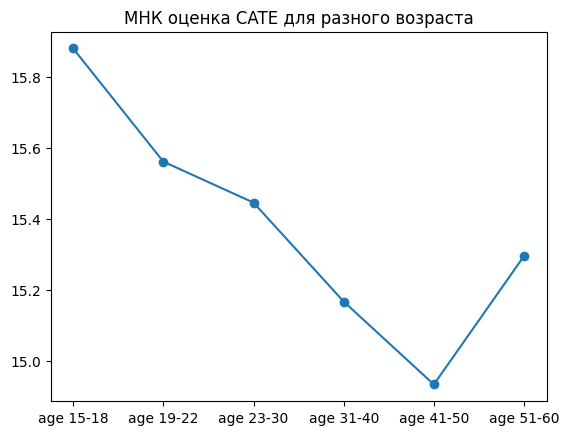

In [300]:
cates_age_groups_OLS = []
age_groups = {
    'age 15-18': (15 <= X_dml['age']) & (X_dml['age'] <= 18),
    'age 19-22': (19 <= X_dml['age']) & (X_dml['age'] <= 22),
    'age 23-30': (23 <= X_dml['age']) & (X_dml['age'] <= 30),
    'age 31-40': (31 <= X_dml['age']) & (X_dml['age'] <= 40),
    'age 41-50': (41 <= X_dml['age']) & (X_dml['age'] <= 50),
    'age 51-60': (51 <= X_dml['age']),
}

for age_group, age_mask in age_groups.items():
    cates_age_groups_OLS.append(cate.loc[age_mask].mean())

CATE_by_age_OLS = pd.DataFrame({'CATE': cates_age_groups_OLS,
                            'age': age_groups.keys()})

plt.plot(CATE_by_age_OLS['age'], CATE_by_age_OLS['CATE'], marker='o')

plt.title('МНК оценка CATE для разного возраста');

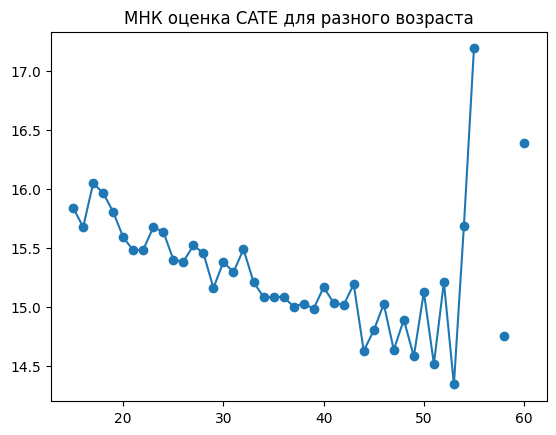

In [301]:
cates_age = []
ages = list(range(15, 61))
for age in ages:
    age_mask = X_dml['age'] == age
    cates_age.append(cate.loc[age_mask].mean())

CATE_by_age = pd.DataFrame({'CATE': cates_age,
                            'age': ages})

plt.plot(CATE_by_age['age'], CATE_by_age['CATE'], marker='o')

plt.title('МНК оценка CATE для разного возраста');

#### Оценка CATE методом S-Learner

#### Оценка CATE методом X-Learner

#### Оценка CATE методом Трансформации классов

#### Оценка CATE методом X-Learner